In [7]:
#Load libraries
import pandas as pd
import nltk
import matplotlib
import numpy

In [8]:
df = pd.read_csv("small_df.csv",delimiter=',')

Import MWE Tokenizer

In [9]:
import nltk
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

In [10]:
#remove score 
#df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(index=[0], inplace=True)


In [11]:
#loop through csv to extract words
##turn the csv into a dictionary
all_doc = df.to_dict(orient='list')

def get_key(val):
    for key, value in all_doc.items():
        if val == value:
            return key
   
##key is header and value is an array of the type (string,POStag) after lemmazation
for val in all_doc.values():
    key = get_key(val)
    val = ' '.join(val)
    val = val.split(" ")
    res = []   #remove "\n"
    for token in val:
        res.append(token.replace('\\n', " "))
    val = ' '.join(res)
    #val = val.split(" ") do tokenization when lemmazation below
    all_doc[key] = val
#split text base on space

In [12]:
all_doc

{'十六區和風料理': "Fancy ambient, good sushi/sashimi. True that the rolls come with plastic and you need to remove before eating them, what might give you the feeling of a cheap place. However the quality is good in my opinion. I recommend. [5, 'One of my favorite Japanese restaurant Their price is reasonable, and so far I never disappointed with my order. The service is also professional.'] [4, 'good japanese food serve in nice portion'] [3, 'Nice ambience, music’s volume can be a bit lower. Service is average. Good attitude but slightly annoying service quality. Food is average. Nothing terrible about it. Ingredients are fresh. Sushi is standard. Rolls are not exactly traditional Japanese style, with the plastic wrapping and the firmly pressed rice.'] [3, 'For gathering is OK, others???']",
 'Shi Tzi Beef Noodles': 'The beef noodles were good and had a decent amount of tender meat for 120NT. The store is known for their rolls though, so make sure to try those! Although a little bit dry, th

In [13]:
#multiword tokenization
from nltk import ngrams
nltk.download('punkt')
n = 2
ngrams_list = []
for val in all_doc.values():
    key = get_key(val)
    ngrams_list += ngrams(nltk.word_tokenize(val), n)
bigrams_list =[gram for gram in ngrams_list]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#!pip3 install spacy

import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
#type(all_doc['十六區和風料理'])
#mw_tokenizer.tokenize('test text')

In [18]:
fdist = nltk.FreqDist(bigrams_list)
#for term,value in fdist.items():
 #   if value and term[0].isalpha() and term[1].isalpha() and term[0] == "not":
    #    print(term,value)
    
for term,value in fdist.items():
    if term[0] == "not" and nlp(term[1])[0].pos_ == "ADJ":
        mw_tokenizer.add_mwe((term[0],term[1]))
'''
temp_doc = {}
for val in all_doc.values():
    key = get_key(val)
    temp_doc[key] = mw_tokenizer.tokenize(val," ")
'''

'\ntemp_doc = {}\nfor val in all_doc.values():\n    key = get_key(val)\n    temp_doc[key] = mw_tokenizer.tokenize(val," ")\n'

In [20]:
#temp_doc

In [8]:
#!pip3 install spacy

#import spacy


In [21]:
#lemmatization
#nlp = spacy.load("en_core_web_sm")
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [(token.lemma_,token.pos_) for token in nlp(val)]

In [22]:
#remove stop-words
!pip3 install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('english')

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in stopwords]



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#visulization of the frequence of tokens
poll_doc = []
for val in all_doc.values():
    poll_doc+= [word[0] for word in val]

from nltk import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4)) 
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

fdist2 = FreqDist(poll_doc)

<Figure size 400x400 with 0 Axes>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


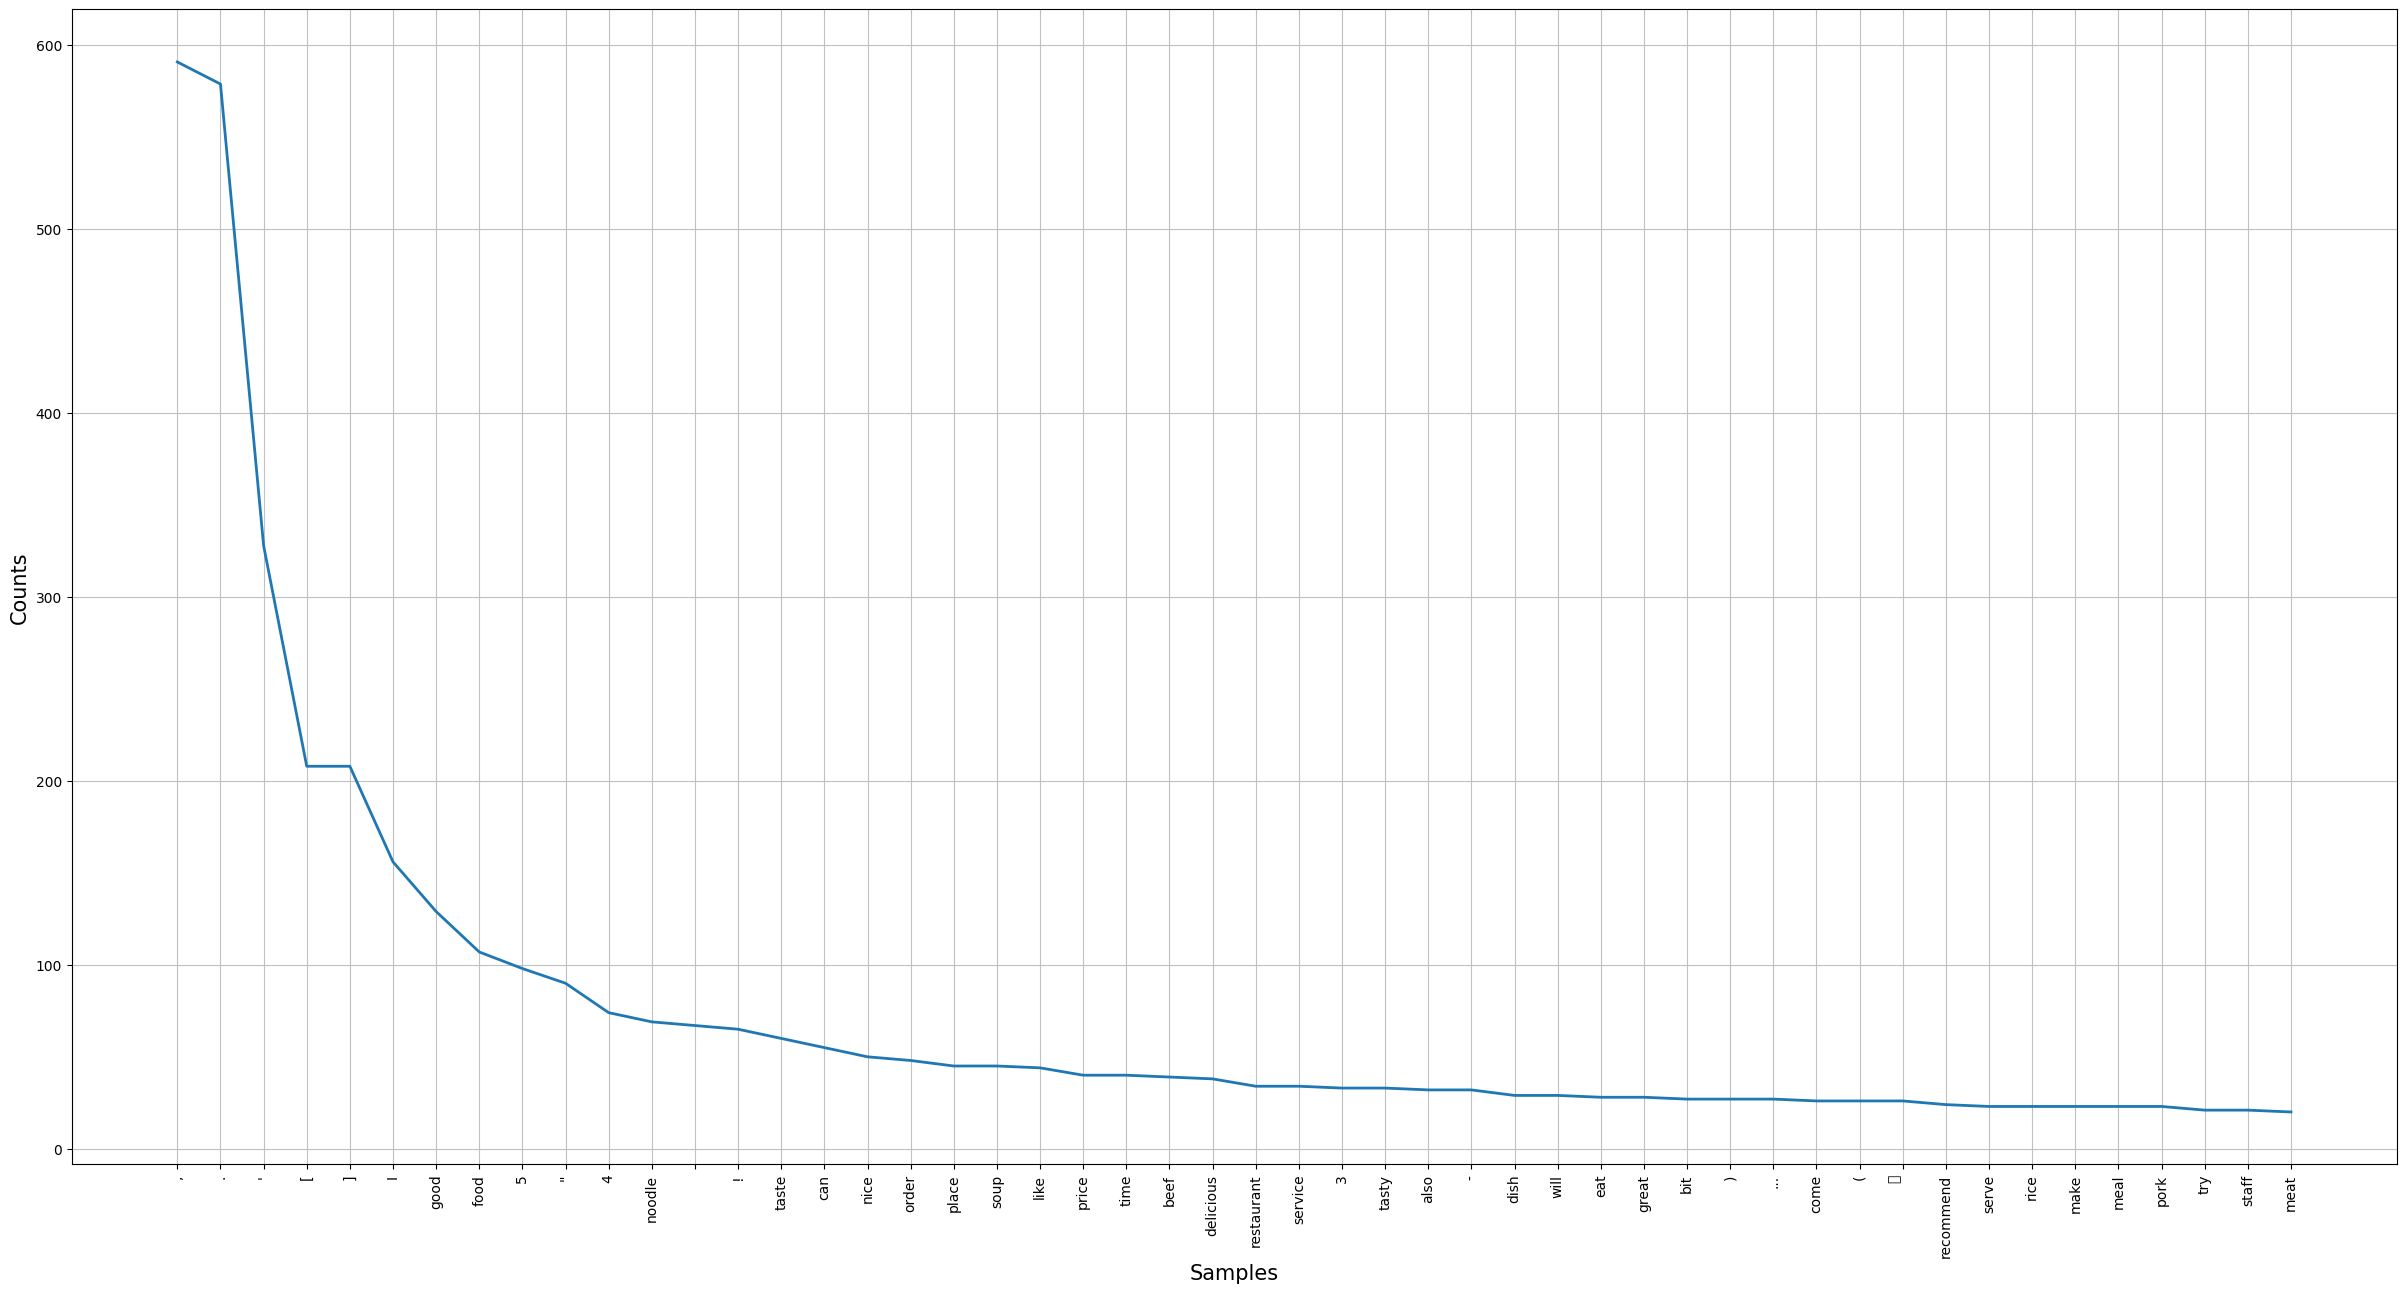

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
plt.rcParams["figure.figsize"] = (30, 15)
fdist2.plot(50, cumulative=False)

In [25]:
#add more stopwords
num = []
for i in range(10):
    num+=str(i)
additional_stopwords = [".",",","'","[","]","(",")","..."," ","\"","!", "-"]+num

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in additional_stopwords and word[0].isalpha()]

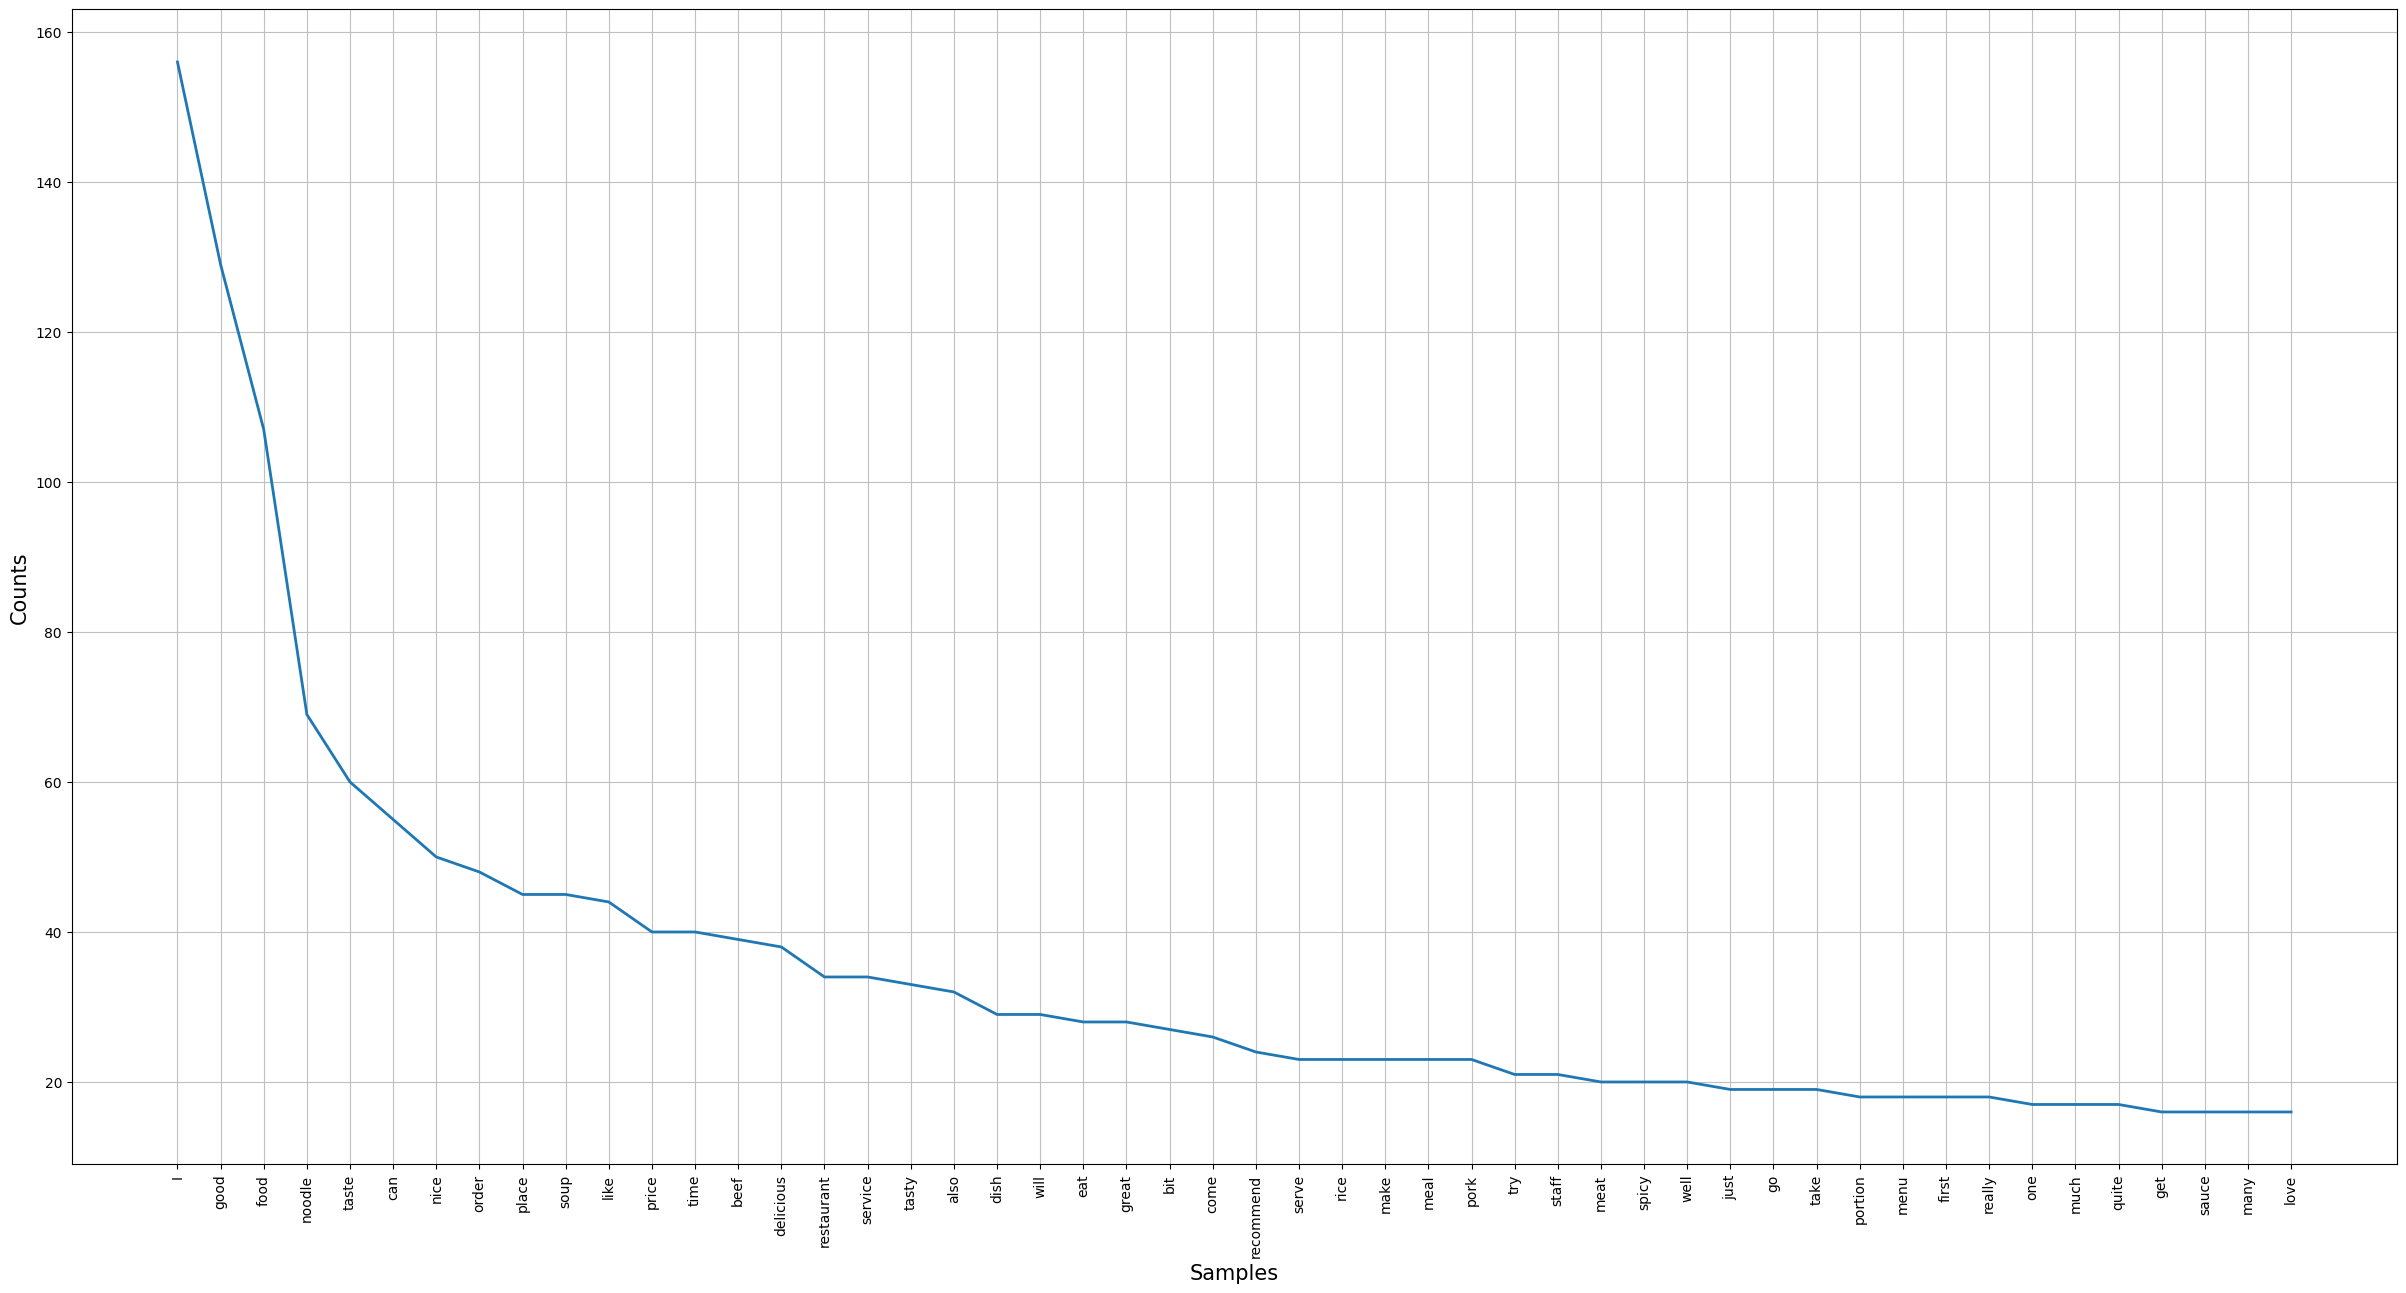

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
poll_doc2 = []
for val in all_doc.values():
    poll_doc2+=[word[0] for word in val]

fdist = FreqDist(poll_doc2)
fdist.plot(50, cumulative=False)

In [27]:
#select Nouns/Adjectives with POS tagging
#meanwhile prepare data(data_tfidf) for tf-idf
data_tfidf = []
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [bi for bi in val if bi[1]=="ADJ"]+[bi for bi in val if bi[1]=="PROPN"]+[bi for bi in val if bi[1]=="NOUN"]
    data_value = [bi[0] for bi in val if bi[1]=="ADJ"]+[bi[0] for bi in val if bi[1]=="PROPN"]+[bi[0] for bi in val if bi[1]=="NOUN"]
    data_value = ' '.join(data_value)
    data_tfidf.append(data_value)

In [28]:
#tf-idf feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.1, max_df=0.8, max_features= None)

In [29]:
feature_matrix = vectorizer.fit_transform(data_tfidf).astype(float)
feature_names = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(feature_matrix.toarray(),columns=[feature_names])
feature_df

,affordable,available,average,bad,beef,big,bit,bowl,bread,cheap,...,sweet,taiwan,taste,tasty,tea,time,value,vegetable,worth,yummy
0,0.000000,0.000000,0.454922,0.000000,0.000000,0.000000,0.160728,0.000000,0.000000,0.180903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.599172,0.000000,0.284443,0.000000,0.000000,0.000000,...,0.082701,0.000000,0.163521,0.119273,0.000000,0.000000,0.000000,0.000000,0.000000,0.100636
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.205252,0.164426,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.289984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.337292,0.000000,0.000000,0.000000,0.219263,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.135104,0.000000,0.290030,0.000000,0.000000,0.116170,0.301485,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.097425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.172520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.186950,0.105935,0.000000,0.000000,0.121530,0.186950,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098532,0.000000,0.000000,0.110900,...,0.114591,0.000000,0.075525,0.000000,0.221800,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.187399,0.205034,0.000000,0.214988,0.000000,0.000000,0.317242,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.450449,0.000000,0.148443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.087458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.162664,0.000000,0.454831,0.000000,0.077824,0.000000,0.000000


In [30]:
#keep only the adjectives
adjs = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'ADJ':
            adjs.append(v[0])

#convert to one string of text
adj_text = ' '.join(str(word) for word in adjs)

#keep only the nouns
nouns = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'NOUN':
            nouns.append(v[0])

#convert to one string of text
noun_text = ' '.join(str(word) for word in nouns)

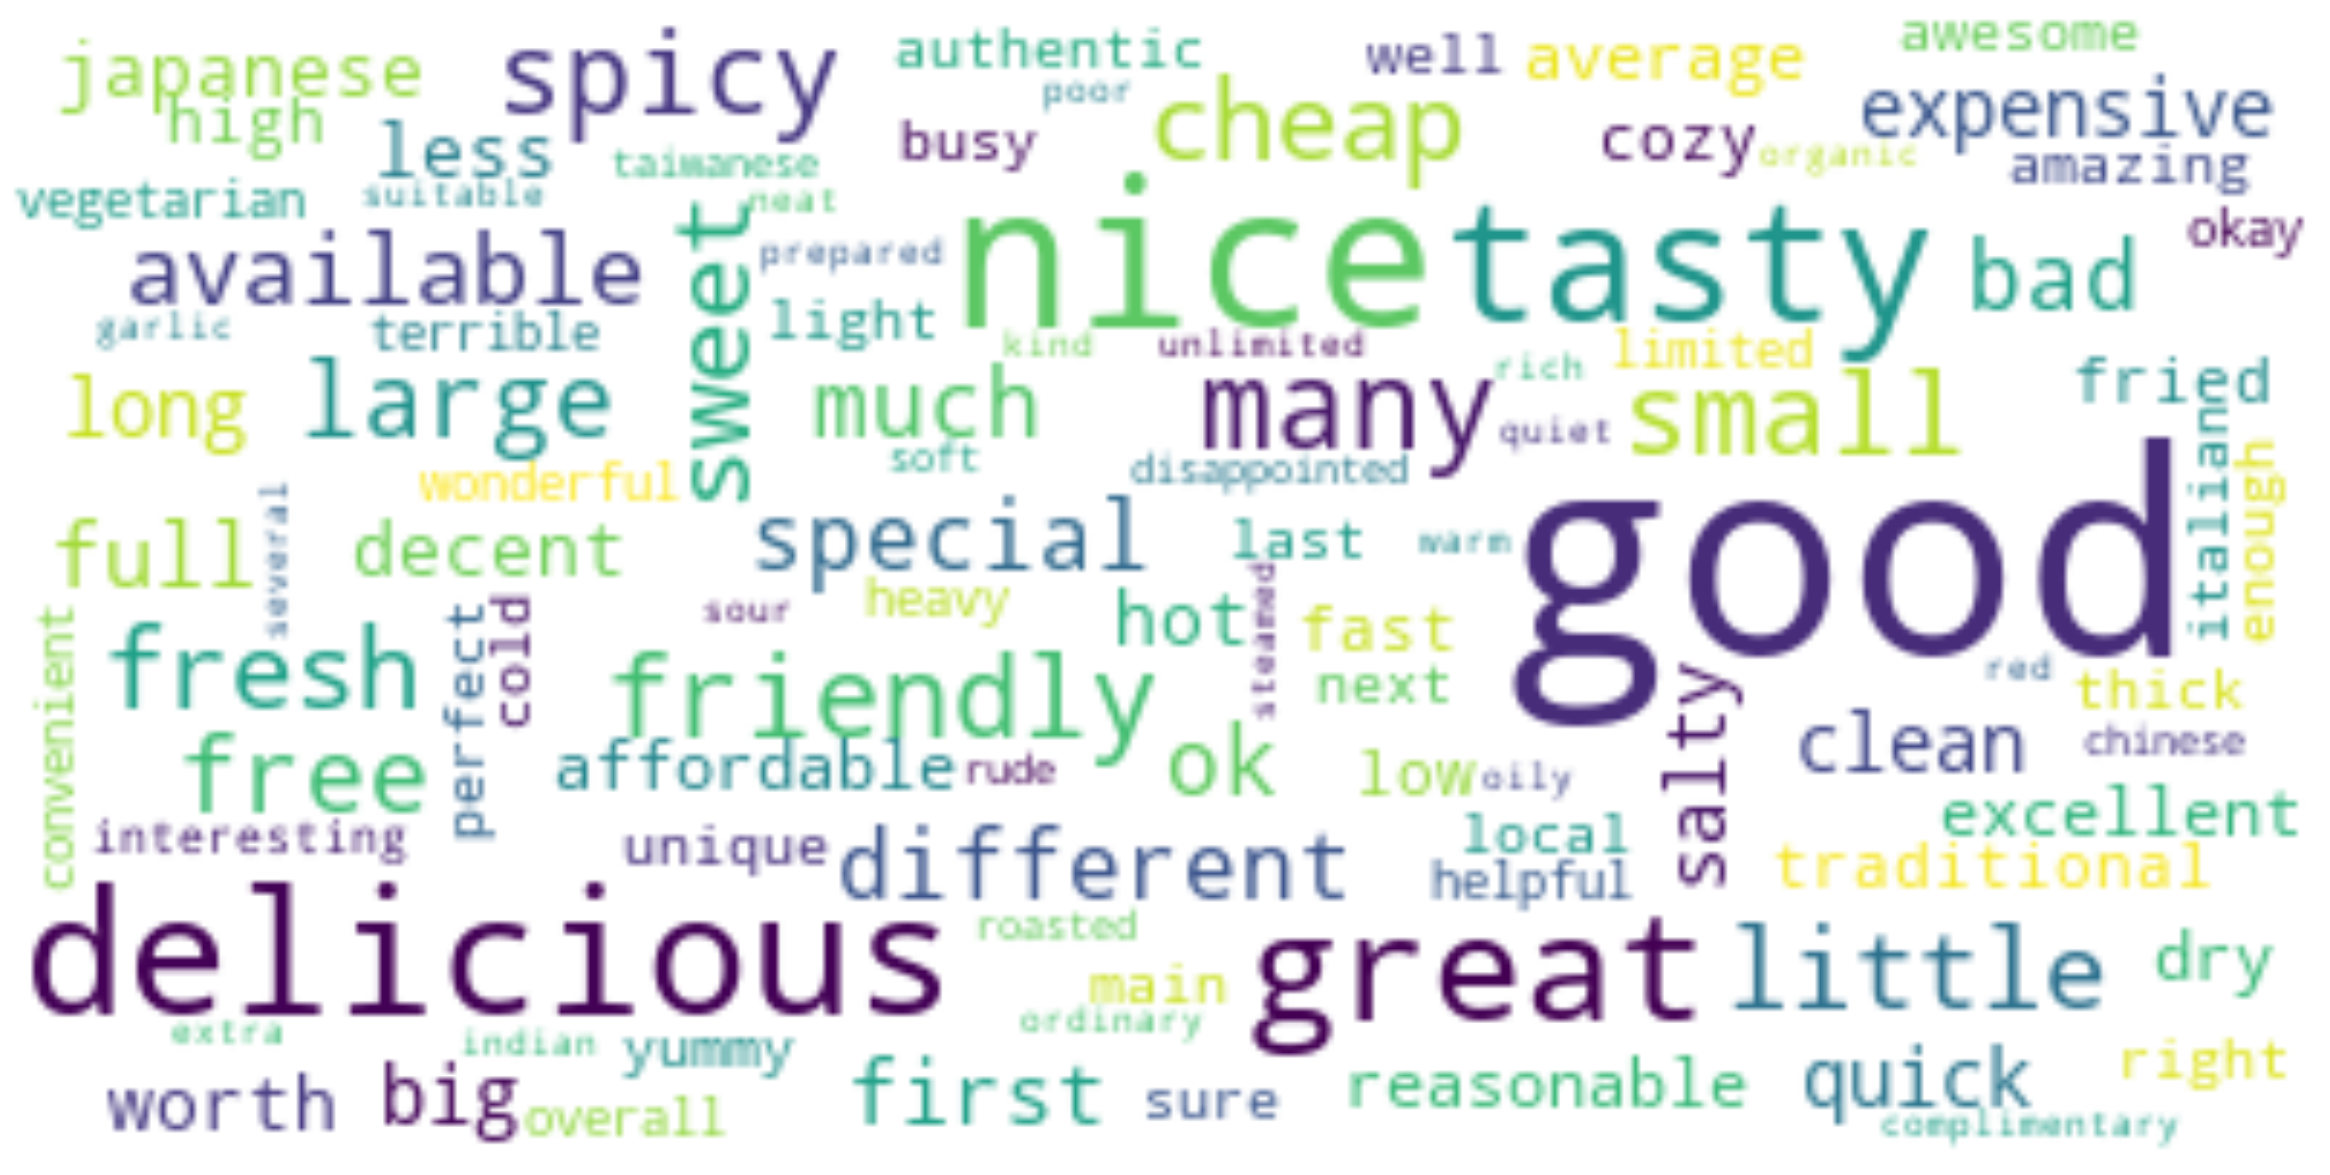

In [32]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(adj_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

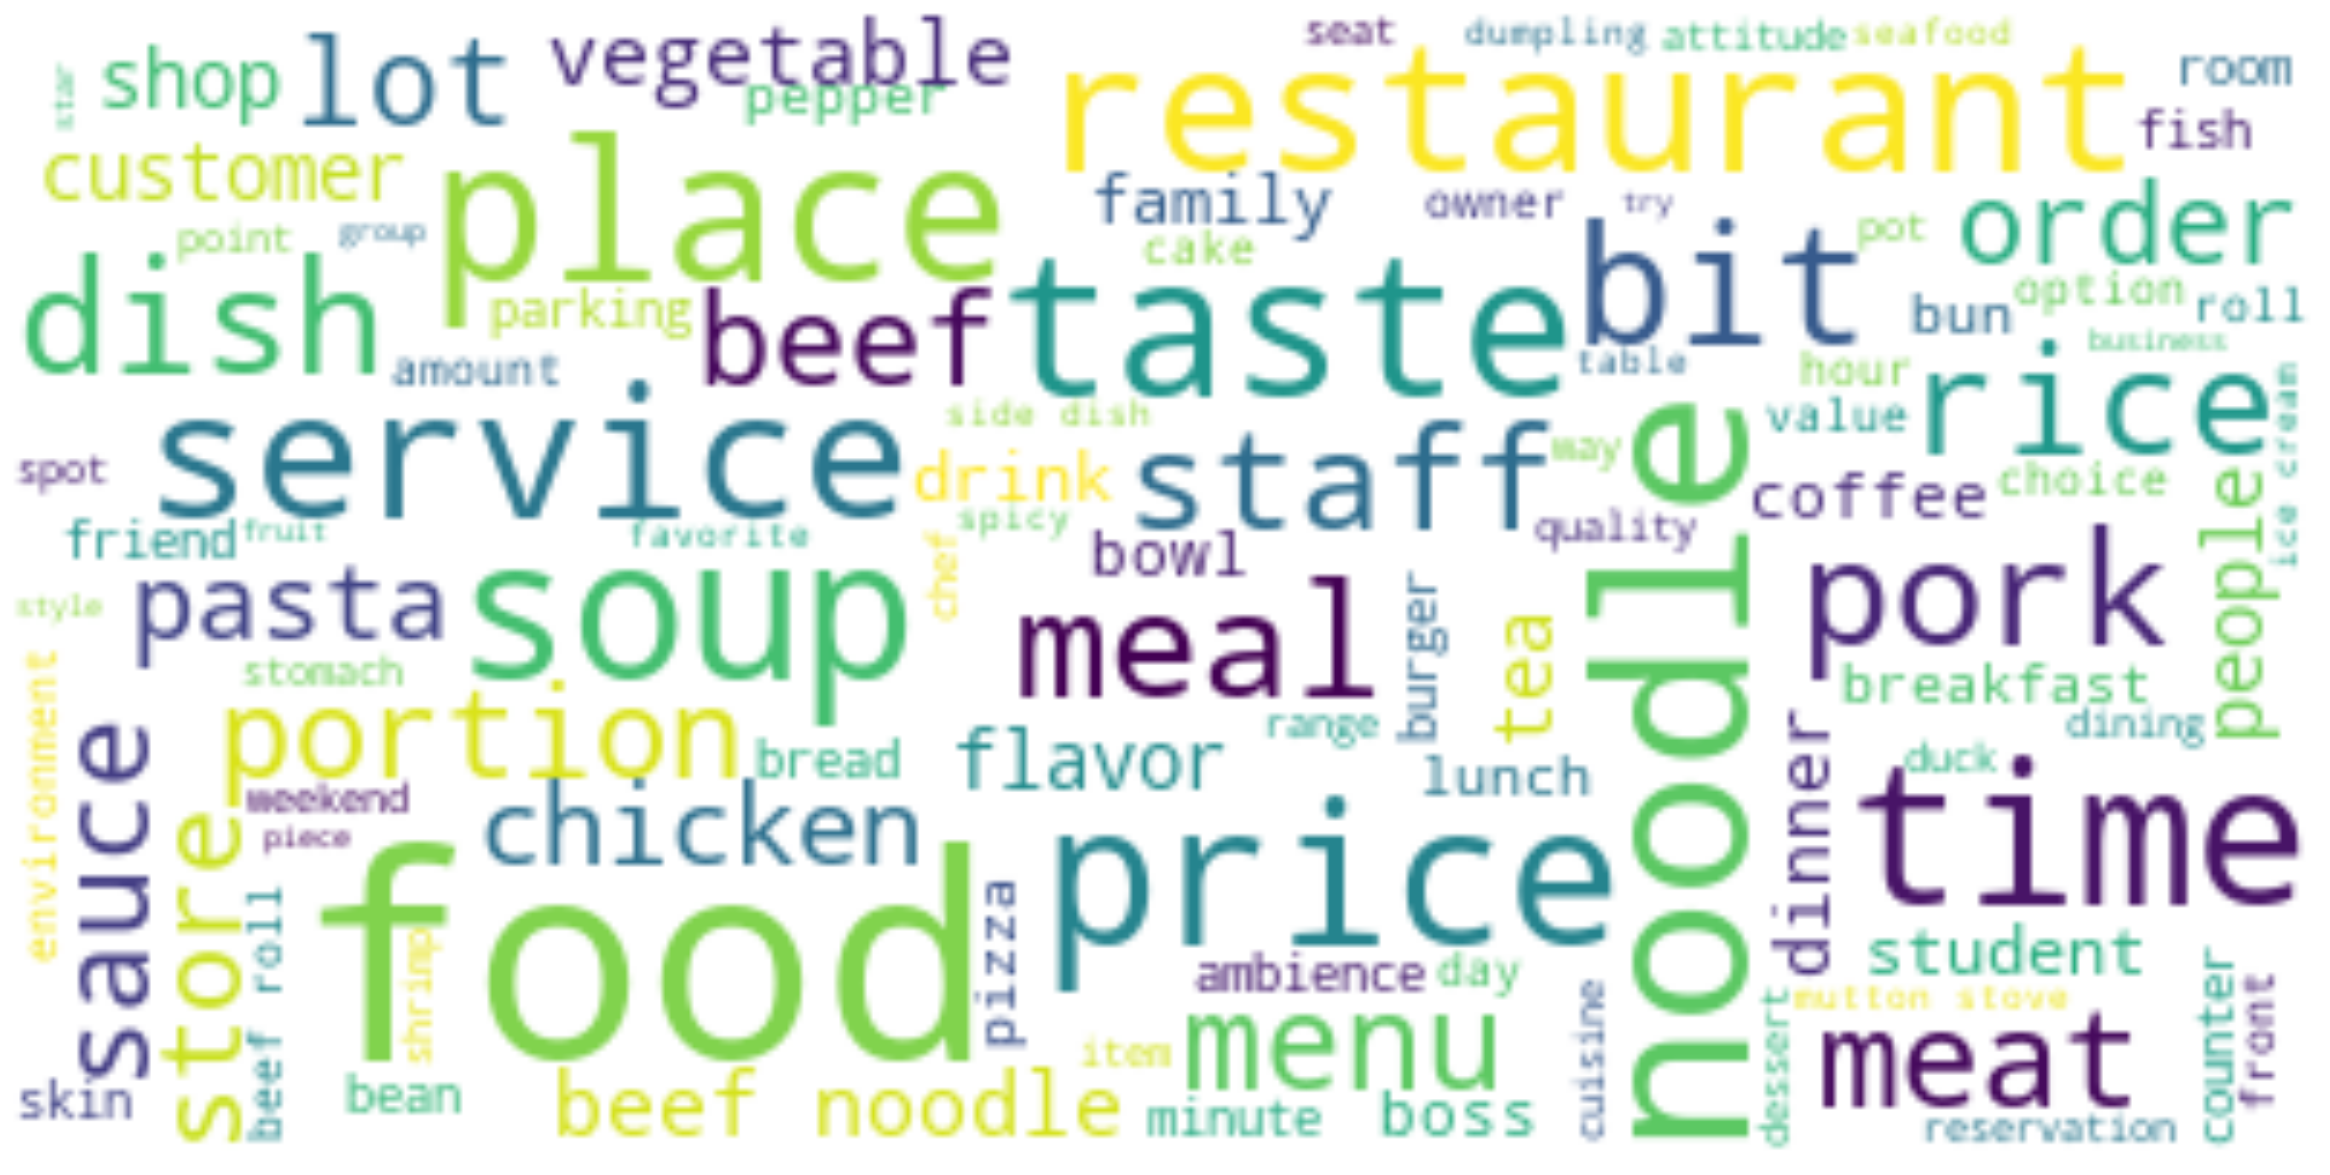

In [33]:
#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(noun_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()